# Evaluate different models for datasets

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2)

Text(0.5, 1.0, 'COVID-GRAM - covidGRAM_vars')

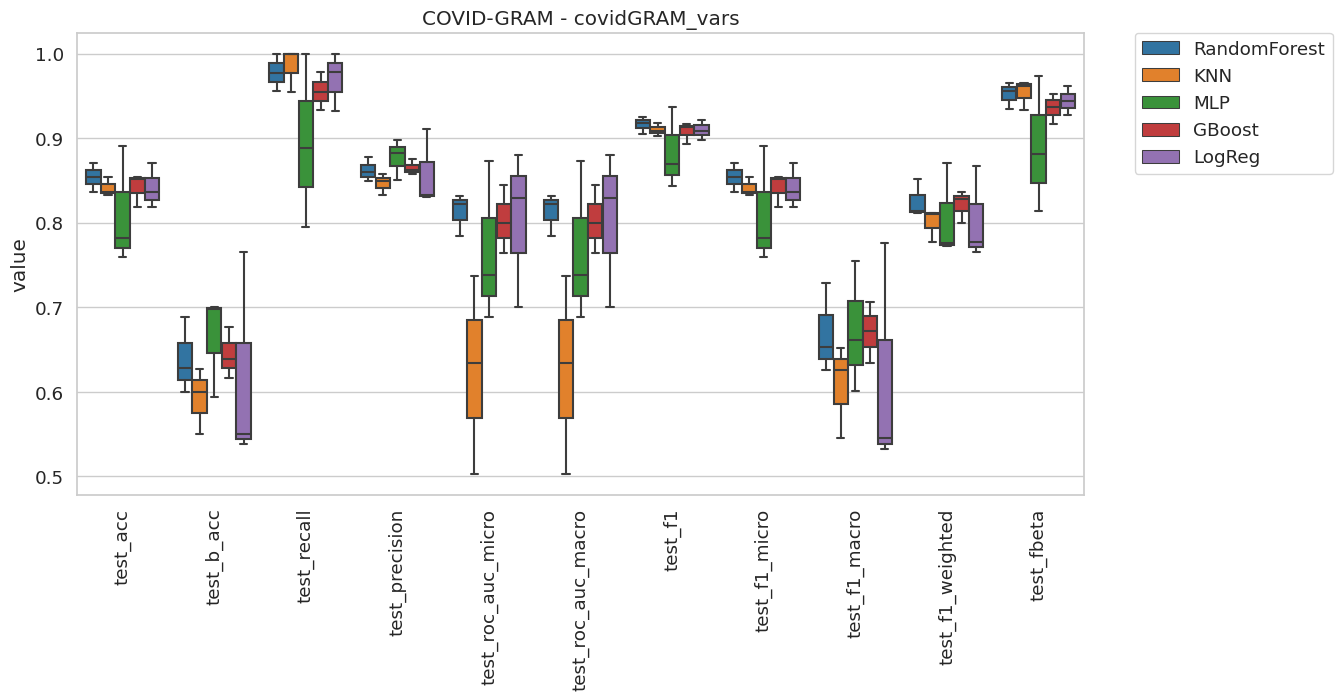

In [2]:
'''
Define paths
'''
varPath = f"../../results/featureSelection/covidGRAM/covidGRAM_vars.txt"
varPath_name = varPath.replace(".", "/").split("/")[-2]
resultsPath = f"../../results/prediction/featureSelection/covidGRAM/modelComparison/{varPath_name}"

''' 
Read in scores
'''
input = pd.DataFrame()
for file in os.listdir(resultsPath):
    if file.endswith("score.csv"):
        input = pd.concat([input,pd.read_csv(f"{resultsPath}/{file}")], axis=0, ignore_index=True)

''' 
Plot
'''
df_plot = input.drop(["fit_time", "score_time"], axis=1)
df_plot = df_plot.melt("model")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="model")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"COVID-GRAM - {varPath_name}")

# Check feature importance

In [3]:
'''
Define paths
'''
varPath = f"../../results/featureSelection/covidGRAM/covidGRAM_vars.txt"
varPath_name = varPath.replace(".", "/").split("/")[-2]
resultsPath = f"../../results/prediction/featureSelection/covidGRAM/modelComparison/{varPath_name}"

Text(0.5, 1.0, 'covidGRAM_vars')

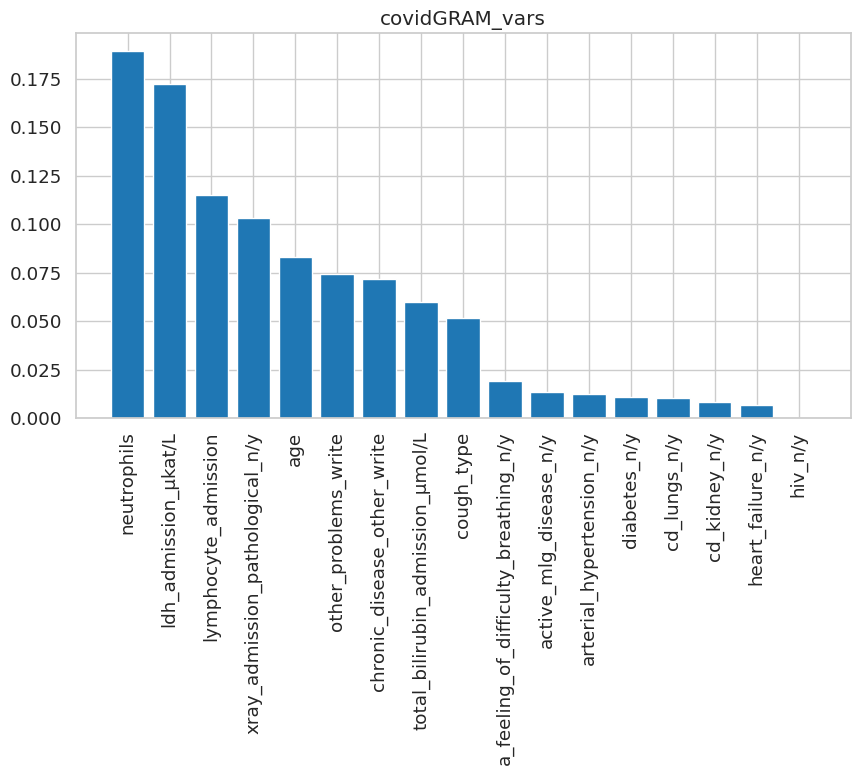

In [4]:
df = pd.read_csv(f"{resultsPath}/RandomForest_featureImportance.csv")

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df["var"], df["fi"])
ax.tick_params(axis='x', rotation=90)
plt.title(f"{varPath_name}")

# Compare COVID-GRAM with Boruta

fit_time              11.602272
score_time             0.828883
test_acc               0.853760
test_b_acc             0.638805
test_recall            0.977609
test_precision         0.862203
test_roc_auc_micro     0.813131
test_roc_auc_macro     0.813131
test_f1                0.916121
test_f1_micro          0.853760
test_f1_macro          0.669171
test_f1_weighted       0.825882
test_fbeta             0.952001
dtype: float64


/tmp/ipykernel_3412668/1308774603.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


Text(0.5, 1.0, 'all datasets')

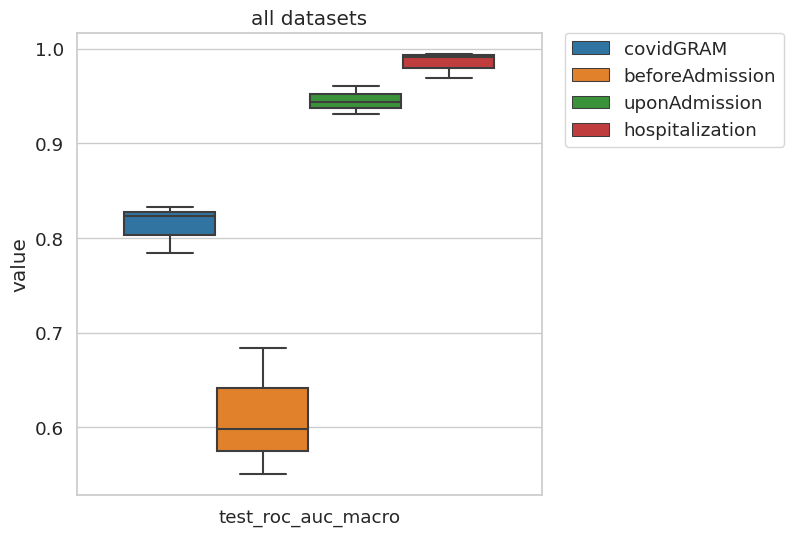

In [7]:
resultsPath_hosp = f"../../results/prediction/featureSelection/covidGRAM/modelComparison/covidGRAM_vars"

''' 
Read Eva's data
'''
df = pd.read_csv(f"{resultsPath_hosp}/RandomForest_score.csv")
print(df.mean())
df["timepoint"] = "covidGRAM"

''' 
Read Boruta's data
'''

input = pd.DataFrame()
for dataset in ["12_beforeAdmission","12_uponAdmission", "12_hospitalization"]: #
    varPath = f"../../results/featureSelection/{dataset}/boruta.txt"
    resultsPath = f"../../results/prediction/featureSelection/{dataset}/boruta/modelComparison"
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_score.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)

df = pd.concat([df, input], axis=0, ignore_index=True)

''' 
Plot
'''

#df_plot = df.drop(["fit_time", "score_time", "model"], axis=1)
df_plot = df.loc[:,["test_roc_auc_macro", "timepoint"]]
df_plot = df_plot.melt("timepoint")

fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="timepoint")
#ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"all datasets")

Text(0.5, 1.0, 'Watch out: sizes of bars can not be compared between datasets!')

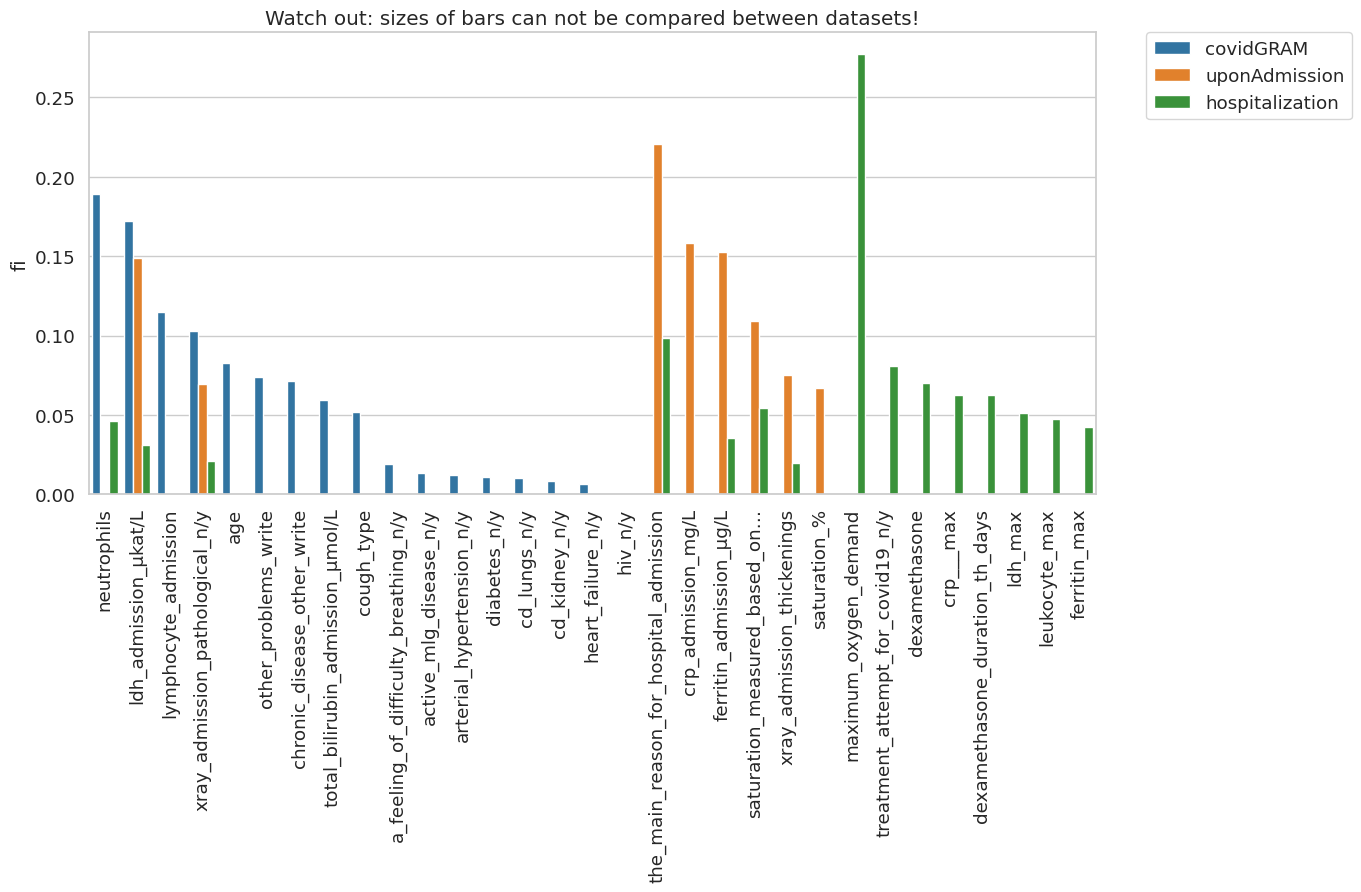

In [8]:
''' 
Read Eva's data
'''
resultsPath_hosp = f"../../results/prediction/featureSelection/covidGRAM/modelComparison/covidGRAM_vars"

df = pd.read_csv(f"{resultsPath_hosp}/RandomForest_featureImportance.csv")
df["timepoint"] = "covidGRAM"

''' 
Read Boruta's data
'''

input = pd.DataFrame()
for dataset in ["12_uponAdmission", "12_hospitalization"]: #12_beforeAdmission
    varPath = f"../../results/featureSelection/{dataset}/boruta.txt"
    resultsPath = f"../../results/prediction/featureSelection/{dataset}/boruta/modelComparison"
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_featureImportance.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)

df = pd.concat([df, input], axis=0, ignore_index=True)

# ''' 
# Plot
# '''

# df_plot = df.drop(["fit_time", "score_time", "model"], axis=1)
# df_plot = df_plot.melt("timepoint")

fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(data=df, x="var", y="fi", hue="timepoint")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Watch out: sizes of bars can not be compared between datasets!")